### importing libraries and reading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


### checking for missing values and other problems in dataset

In [3]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


### cleaning dataset

##### Removing rows where group and landing_page don't match
##### e.g., control group with new_page or treatment with old_page

##### Removing duplicate user_ids to ensure independence of observations

In [5]:
df[(df['group']=='control')&(df['landing_page']=='new_page')].shape

(1928, 5)

In [6]:
df[(df['group']=='treatment')&(df['landing_page']=='old_page')].shape

(1965, 5)

In [7]:
df=df[((df['group']=='control')&(df['landing_page']=='old_page'))|((df['group']=='treatment')&(df['landing_page']=='new_page'))]

In [8]:
df.shape

(290585, 5)

In [9]:
df.user_id.nunique()

290584

In [10]:
df[df.duplicated(subset=['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [11]:
df=df[~df.duplicated(subset=['user_id'])]

In [12]:
df.shape

(290584, 5)

### finding the difference between group A and group B

In [13]:
treatment_mean=df[df['group']=='treatment']['converted'].mean()
control_mean=df[df['group']=='control']['converted'].mean()
print('Treatment group mean: ',treatment_mean)
print('Control group mean: ',control_mean)
print('difference between new and old pages: ',treatment_mean - control_mean)

Treatment group mean:  0.11880806551510564
Control group mean:  0.1203863045004612
difference between new and old pages:  -0.0015782389853555567


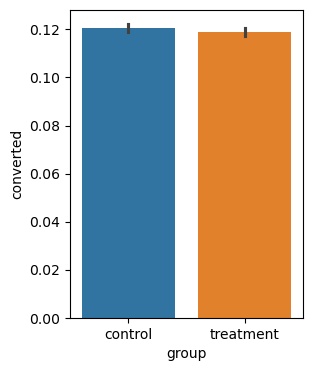

In [14]:
fig,ax=plt.subplots(figsize=(3,4))
sns.barplot(data=df,x='group',y='converted',hue='group',ax=ax)
plt.savefig('../images/barplot.png')

##### We can see that the conversion rate has decreased using the new page
##### we now need to test if this small drop is statistically meaningful

### testing if the difference is statistically meaningful or not
##### H0 = There is no statistically significant difference in conversion rates.
##### H1 = There is a statistically significant difference in conversion rates.
##### alfa = 0.05

In [15]:
print(df[df['group']=='control']['converted'].value_counts())
print(df[df['group']=='treatment']['converted'].value_counts())


converted
0    127785
1     17489
Name: count, dtype: int64
converted
0    128046
1     17264
Name: count, dtype: int64


In [16]:
from statsmodels.stats.proportion import proportions_ztest
count=[df[df['group']=='control']['converted'].sum(),df[df['group']=='treatment']['converted'].sum()]
nobs=[df[df['group']=='control']['converted'].count(),df[df['group']=='treatment']['converted'].count()]
stat,pval=proportions_ztest(count,nobs)
print('stat= ',stat)
print('pval= ',pval)

stat=  1.3109241984234394
pval=  0.18988337448195103


In [17]:
if pval < 0.05:
    print("Reject H0: There is a statistically significant difference in conversion rates.")
else:
    print("Fail to Reject H0: No statistically significant difference found.")

Fail to Reject H0: No statistically significant difference found.
